# Speed dating predicton



In [0]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [3]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For processing
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [0]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


# 2)- Loading data

In [7]:
df =pd.read_csv('Speed Dating Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(8378, 195)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [10]:
#Let's check our dep. variable i.e labels
df['match'].head()

0    0
1    0
2    1
3    1
4    1
Name: match, dtype: int64

In [11]:
df.groupby("match").size()

match
0    6998
1    1380
dtype: int64

In [12]:
df['match'].value_counts().sort_values(ascending=False)

0    6998
1    1380
Name: match, dtype: int64

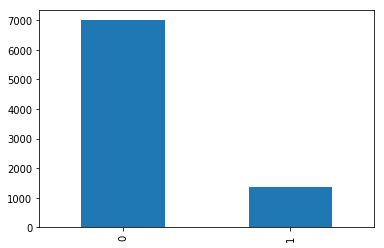

In [13]:
df['match'].value_counts().plot(kind='bar')

### seperate features and labels

In [0]:
df_labels=df['match']

In [0]:
df = df.drop(['match'], axis=1)

In [16]:
df_labels[:5]

0    0
1    0
2    1
3    1
4    1
Name: match, dtype: int64

# 3)-Preprocessing Data

3.1 Cleaning <br>
3.2 Transformation <br>
3.3 Reduction by PCA <br>

### 3.1 Cleaning

a)-null values

In [17]:
na_sum = list(df.isnull().sum())
print(len(na_sum))

194


In [18]:
na_col = list(df.isnull().sum().index)
print(len(na_col))

194


If a feature has more than 30% (2523) of values are null, we just drop the whole column.

In [19]:
drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 2523:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  83  Columns


In [20]:
df = df.drop(drop_col,axis=1)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,...,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [21]:
df.shape

(8378, 111)

From 195 to 112 columns now. Columns represent our features

In [22]:
# Checking rows now
#check if any NaN values
df.isnull().values.any()

True

**Imputing null values with mean**

In [0]:
df = df.fillna(df.mean())

In [24]:
df.isnull().values.any()

True

Still we have null values.

In [25]:
na_sum = list(df.isnull().sum())
na_col = list(df.isnull().sum().index)
nan_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 0:
        nan_col.append(na_col[i])
nan_col

['field', 'from', 'zipcode', 'career']

In [26]:
df[['field', 'from', 'zipcode', 'career']].head()

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


In [0]:
df_type=df[['field', 'from', 'zipcode', 'career']]

In [28]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 4 columns):
field      8315 non-null object
from       8299 non-null object
zipcode    7314 non-null object
career     8289 non-null object
dtypes: object(4)
memory usage: 261.9+ KB


These columns are values with object type. It is hard to predict null values for these variables. So, let's just drop all these variables

In [0]:
df = df.drop(['from','zipcode','field','career'], axis=1)

In [30]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,...,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,9.295775,4,1,11.0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,...,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.000000,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,9.295775,3,2,12.0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,...,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.000000,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,9.295775,10,3,13.0,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,...,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,5.207523,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,9.295775,5,4,14.0,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,...,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.000000,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,9.295775,7,5,15.0,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,...,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.000000,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [31]:
df.isnull().values.any()

False

### 3.2)-Transformation

Normalize data

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df) # Since we have separated our label i.e match feature.So, all other values are in X

In [33]:
X.shape

(8378, 107)

### 3.3)-Dimension Reduction
PCA methods being used <br>
Find out what is fairly good value for n_components according to the Explained Variance 
Ratio <br>
Reduce dimensions by the n_components<br>

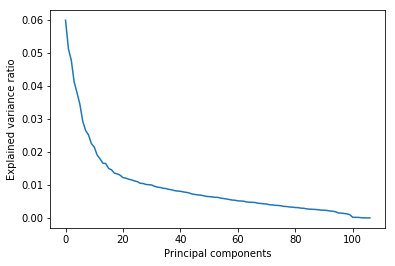

In [34]:
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,107), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

**From above figure, we will choose 80 as the dimensions of Principal components.**

In [35]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 80)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')

[[-0.11278903  0.43893836 -3.99012152 ...  1.24408069  0.56947507
  -0.74990845]
 [-0.46084861  0.179021   -3.58830924 ...  1.14810351  0.38045288
  -0.65840161]
 [-2.61677881  2.52342721 -5.04277569 ...  1.33509758  0.44050557
  -0.68716524]
 ...
 [ 4.29349423  3.11398044  8.86817898 ...  1.46953057 -0.2501195
   0.77704497]
 [ 3.06349127  4.87790232  7.91930178 ...  0.92375471 -1.1262404
  -0.35889771]
 [ 1.87201351  5.70640483  7.50899066 ...  1.16882038 -0.74062151
  -0.32560089]]



In [36]:
print(pca.explained_variance_ratio_)

[0.0599287  0.05130629 0.04778579 0.04120846 0.03794963 0.03442235
 0.02928028 0.02648273 0.02516247 0.02253369 0.02148449 0.01909422
 0.01792891 0.01660708 0.01649287 0.01499748 0.01459388 0.0135756
 0.01335547 0.01295986 0.01223028 0.01205562 0.01173874 0.0115274
 0.01122595 0.01099925 0.01050502 0.01044225 0.01014913 0.0100701
 0.00998956 0.00958083 0.00934085 0.00921803 0.00898174 0.00889457
 0.00866533 0.00851308 0.00827408 0.00815331 0.00807841 0.00788845
 0.00775316 0.00759845 0.00726421 0.00711506 0.00700375 0.00689954
 0.00674686 0.00654717 0.00645786 0.00639408 0.00625039 0.00623934
 0.00600695 0.00588633 0.00575062 0.00558899 0.00542309 0.00535541
 0.00517289 0.00513963 0.00507159 0.00485733 0.00475006 0.00472919
 0.00467537 0.00446327 0.0043806  0.00428298 0.00421754 0.00400303
 0.00394998 0.00380737 0.00377468 0.00366926 0.00349378 0.00339799
 0.00330336 0.00323617]


In [37]:
sum(pca.explained_variance_ratio_)

0.9543295537845651

In [38]:
x_pca.shape

(8378, 80)

# 4- Model Training  

### Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, df_labels, test_size=0.2, random_state=0)

In [40]:
print(X_train.shape)
print(X_test.shape)

(6702, 80)
(1676, 80)


In [41]:
print(y_train.shape)
print(y_test.shape)

(6702,)
(1676,)


In [42]:
X_train

array([[-4.68464167, -2.82486563, -1.51036984, ..., -0.04102065,
        -0.69027114,  0.2202485 ],
       [-0.74018258,  1.56521953, -0.06997607, ...,  0.2491107 ,
         0.33756497,  0.42363954],
       [ 1.74612928, -3.12552498,  1.71795536, ...,  0.0546167 ,
         0.45823286,  0.27855506],
       ...,
       [ 0.75099825, -2.49960655, -1.51160936, ..., -0.31342012,
        -0.21124028,  0.70019733],
       [-3.93462881,  2.84871942, -1.62335673, ...,  0.56372732,
         0.12162239,  0.08209962],
       [-1.56477132, -1.87060749, -0.83035991, ..., -0.45500534,
        -0.66363011, -0.23294656]])

## 4.1)- Manual Neural Network

1-Build the Neural Network <br>
2 -Set the hyperparameters, train the NN and evaluate<br>
3- Adapt SGD method to improve the accuracy<br>

#### a)-Build the Neural Network

In [0]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # TODO: Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # TODO: Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        # TODO: Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

#### b)-Train the model and evaluation

In [44]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

print(metrics.accuracy_score(y_test,y_pred[0]))

0.6640811455847255


In [45]:
print(metrics.recall_score(y_test,y_pred[0]))

0.9962825278810409


#### c)-SGD 

Stochastic gradient descent

In [0]:
N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

random_row_idx = np.zeros(128)
for e in range(epochs):
    random_row_idx = np.random.choice(X_train.shape[0],size=128)
    X_batch = X_train[random_row_idx,:]
    y_batch = y_train[random_row_idx]
    network.train(X_batch, y_batch)

In [47]:
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0
print(metrics.accuracy_score(y_test,y_pred[0]))

0.8394988066825776


## 4.2-Neural Network using Tensorflow

In [0]:
import tensorflow as tf

In [49]:
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions_tf = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions_tf)

W0621 21:50:49.835163 139713708164992 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0621 21:50:49.836476 139713708164992 deprecation.py:323] From <ipython-input-49-c9cee6ea5379>:1: infer_real_valued_columns_from_input (from tensorflow.contrib.learn.python.learn.estimators.estimator) is deprecated and will be removed in a future version.
Instructions for updating:
Please specify feature columns explicitly.
W0621 21:50:49.838068 139713708164992 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py:143: setup_train_data_feeder (from tensorflow.contrib.learn.python.learn.learn_io.data_f

In [50]:
print('TF Accuracy: ', score)

TF Accuracy:  0.9976133651551312


# 4.3) Neural network Using Keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy
from sklearn.preprocessing import StandardScaler

In [0]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

W0621 21:51:18.917740 139713708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 21:51:18.919698 139713708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 21:51:18.924459 139713708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 21:51:18.969696 139713708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0621 21:51:18.980757 

In [54]:
# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

W0621 21:51:19.011296 139713708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 21:51:19.036694 139713708164992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.



In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                1215      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,472
Trainable params: 1,472
Non-trainable params: 0
_________________________________________________________________


In [56]:
# call the function to fit to the data (training the network)
history=model.fit(X_train, y_train, epochs = 100, batch_size=20, validation_data=(X_test, y_test))

Train on 6702 samples, validate on 1676 samples
Epoch 1/100
6702/6702 [==============================] - 2s 262us/step - loss: 0.3889 - acc: 0.8233 - val_loss: 0.2304 - val_acc: 0.8484
Epoch 2/100
6702/6702 [==============================] - 1s 201us/step - loss: 0.1251 - acc: 0.9521 - val_loss: 0.0315 - val_acc: 0.9928
Epoch 3/100
6702/6702 [==============================] - 1s 198us/step - loss: 0.0226 - acc: 0.9952 - val_loss: 0.0077 - val_acc: 0.9994
Epoch 4/100
6702/6702 [==============================] - 1s 198us/step - loss: 0.0096 - acc: 0.9973 - val_loss: 0.0049 - val_acc: 0.9994
Epoch 5/100
6702/6702 [==============================] - 1s 196us/step - loss: 0.0046 - acc: 0.9991 - val_loss: 0.0032 - val_acc: 0.9994
Epoch 6/100
6702/6702 [==============================] - 1s 198us/step - loss: 0.0033 - acc: 0.9996 - val_loss: 0.0034 - val_acc: 0.9994
Epoch 7/100
6702/6702 [==============================] - 1s 198us/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0035 - val_acc: 

In [0]:
y_pred_keras = model.predict(X_test)

In [0]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)

In [67]:
yhat_class_keras[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [68]:
print(recall_score(y_test, yhat_class_keras))
print(accuracy_score(y_test, yhat_class_keras))

0.9925650557620818
0.9988066825775657


In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, yhat_class_keras))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       1.00      0.99      1.00       269

    accuracy                           1.00      1676
   macro avg       1.00      1.00      1.00      1676
weighted avg       1.00      1.00      1.00      1676



In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

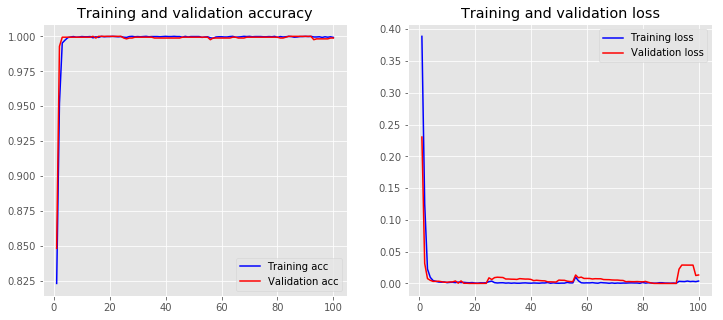

In [71]:
plot_history(history)

## 4.4)- SVC

It is same as SVM. is a wrapper around the libsvm library and supports different kernels while LinearSVC is based on liblinear and only supports a linear kernel

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [73]:
y_pred_svc[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
print('SVM Accuracy: ', metrics.accuracy_score(y_test,y_pred_svc))

SVM Accuracy:  0.9946300715990454


In [75]:
print(metrics.recall_score(y_test,y_pred_svc))

0.966542750929368


## 4.5)-Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [77]:
y_pred_log

array([0, 0, 0, ..., 0, 0, 1])

In [78]:
print('Log Regression Accuracy: ', metrics.accuracy_score(y_test,y_pred_log))

Log Regression Accuracy:  1.0


Seems overfit as accuracy can only be 100% in an ideal scenario

In [79]:
print(metrics.recall_score(y_test,y_pred_log))

1.0


Manual NN: 0.839498806683.<br>
TF Accuracy: 0.999403341289<br>
Dense Neural Network:0.998 <br>
SVM Accuracy: 0.994630071599<br>
Log Regression Accuracy: 1.0<br>